- title: Z-scores
- slug: z-scores
- summary: Learn how to calculate z-scores, interpret them and implement them in Python using the scipy package
- date: 2018-1-4 18:30
- category: Math
- subcategory: Descriptive Statistics
- posttype: Article
- keywords: z-score python
- tags: z-score, statistics, standard deviation, normal distribution, python, pandas
- authors: Dan Friedman

A **z-score** is the number of standard deviations away from a mean for a data point. A z-score helps point out how *unusual* or *usual* a data point is from the other values. A z-score must be used with a normal distribution curve.

#### Import Modules

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
% matplotlib inline

#### Visualization styling code

In [3]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')

#### Turn Off Warnings

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [4]:
warnings.filterwarnings('ignore')

### Example: z-scores of U.S. Heights

I generate a pandas DataFrame to simulate heights of people in the U.S. from a normal distribution. Note: in order to calculate z-scores of values, you need a normal distribution.

In [5]:
np.random.seed(42)
population_size = 5000
df_heights = pd.DataFrame(data={'us_height_inches': np.random.normal(loc=66, scale=2.9, size=population_size)})

Preview `df_heights`.

In [6]:
df_heights.head()

,us_height_inches
0,67.440471
1,65.599034
2,67.878297
3,70.416787
4,65.320955


Visualize the distribution of `df_heights` values.

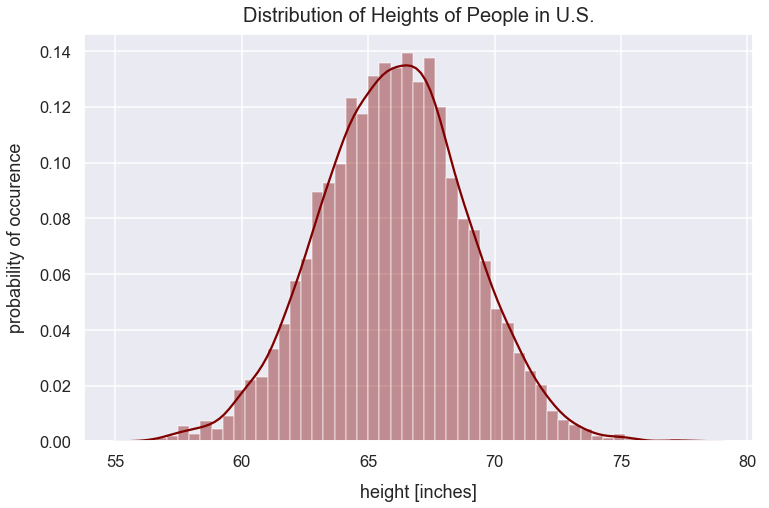

In [7]:
sns.distplot(df_heights['us_height_inches'], color="maroon")
plt.xlabel("height [inches]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Heights of People in U.S.", y=1.015, fontsize=20);

Calculate the population mean height in the U.S. using the pandas series mean() <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html'>method</a>.

In [8]:
pop_mean_us_height_inches = df_heights['us_height_inches'].mean()
pop_mean_us_height_inches

66.01624559725403

Calculate the population standard deviation height in the U.S. using the pandas series std() <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html'>method</a>.

In [9]:
pop_std_dev_us_height_inches = df_heights['us_height_inches'].std()
pop_std_dev_us_height_inches

2.889791503580723

Given any person's height, I can calculate the number of standard deviations that height is from the mean by using the z-score equation:

$$z-{score}=\frac{x-\mu}{\sigma}$$

- $x$ is a score
- $\sigma$ is the population standard deviation
- $\mu$ is the population mean

Create a new column `z-score` that's the z-score for each person's height.

In [10]:
df_heights['us_z-score'] = (df_heights['us_height_inches']-pop_mean_us_height_inches)/pop_std_dev_us_height_inches

Preview `df_heights`.

In [11]:
df_heights.head()

,us_height_inches,us_z-score
0,67.440471,0.492847
1,65.599034,-0.144374
2,67.878297,0.644355
3,70.416787,1.522788
4,65.320955,-0.240602


Based on the z-scores computed, I can interpret the z-score values. For example, here's an interpretation for a few people:

In [12]:
for person in df_heights.itertuples():
    index_person = 0
    index_height_inches = 1
    index_z_score = 2
    
    index = person[index_person]
    height = round(person[index_height_inches], 2)
    z_score = round(person[index_z_score], 2)
    
    if index <= 4:
        print("This person at index {0} has an height in inches of {1} and is approximately {2} standard deviations from the U.S. population mean height in inches.\n".format(index, height, z_score))

This person at index 0 has an height in inches of 67.44 and is approximately 0.49 standard deviations from the U.S. population mean height in inches.

This person at index 1 has an height in inches of 65.6 and is approximately -0.14 standard deviations from the U.S. population mean height in inches.

This person at index 2 has an height in inches of 67.88 and is approximately 0.64 standard deviations from the U.S. population mean height in inches.

This person at index 3 has an height in inches of 70.42 and is approximately 1.52 standard deviations from the U.S. population mean height in inches.

This person at index 4 has an height in inches of 65.32 and is approximately -0.24 standard deviations from the U.S. population mean height in inches.



In a normal distribution, there is a standard range of values that *generally* fall within a certain number of standard deviations from the mean:

% of total height values | range in distribution | z-scores from mean
--- | --- | ---
$68$ | $\mu\pm\sigma$ | $\pm1$
$95$ | $\mu\pm1.96\sigma$ | $\pm1.96$
$99$ | $\mu\pm2.58\sigma$ | $\pm2.58$

There are $5000$ height values in this dataset. Therefore, it's likely approximately $68\%$ of values are within $\pm1$ z-scores from the mean. Let's verify this with our dataset.

In [41]:
values_plus_minus_one_z_score = len(df_heights[df_heights['us_z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df_heights)*100
percent_values_plus_minus_one_z_score

68.56

$68.56\%$ of values fall within $\pm1$ z-scores from the mean which is very close to $68\%$

Above, I standardized a distribution by getting every value's z-score. I can now visualize the distribution of z-scores below that correspond to specific height values. The histogram below looks like a normal distribution. The official term for it is a **standard normal distribution**.

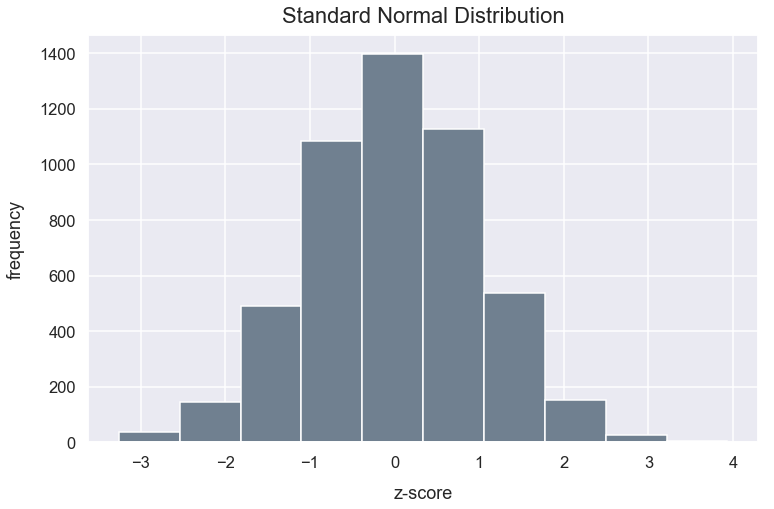

In [13]:
df_heights['us_z-score'].hist(color='slategray')
plt.title("Standard Normal Distribution", y=1.015, fontsize=22)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);

Every point in our dataset is now illustrated as the number of standard deviations away from the mean - represented by its z-score.

In the distribution above, the standard deviation is 1.

In [14]:
z_score_distribution_std_dev = round(df_heights['us_z-score'].std(), 2)
z_score_distribution_std_dev

1.0

### Comparison of Z-Scores from Two Populations

Above, we had data on heights of people in the U.S. My friend Leslie was born in the U.S. and is 63 inches. My other friend Jamie was born in the Phillipines and is 57 inches tall. I'm curious which of my friends is relatively *taller* for their respective country's height.

In [15]:
height_leslie_inches = 63
height_jamie_inches = 57

To get the *relative* height for each population distribution, I'll calculate the z-score for each friend's height based on the country's population distribution using the z-score equation and round each value to two decimal places. For this example, I created normal distributions of heights for values in the Phillipines and United States.

Using the z-score allows standardization among the two distributions of heights in the U.S. and Phillipines so we can easily compare where Leslie and Jamie reside on each distribution.

The code below generates a normal distribution of heights for people in the Philippines.

In [16]:
df_heights['philippines_height_inches'] = np.random.normal(loc=61, scale=3.2, size=population_size)

The visualization below illustrates the distribution of heights for people in the U.S., Phillippines as well as Leslie's and Jamie's height. 

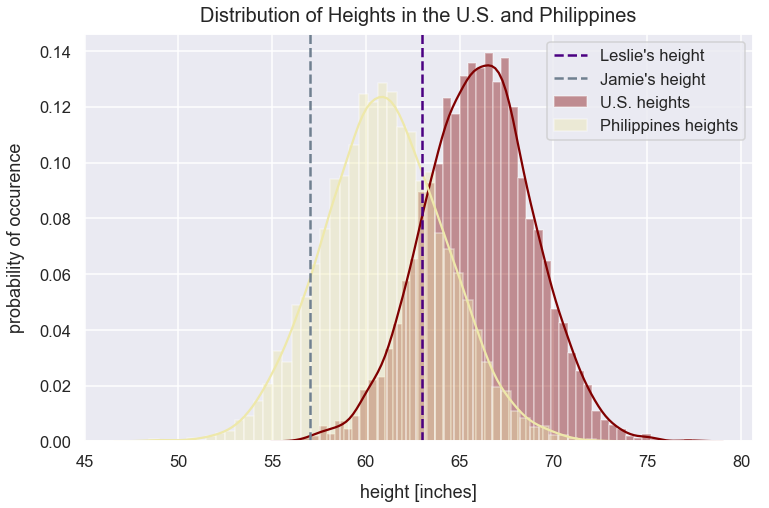

In [17]:
sns.distplot(df_heights['us_height_inches'], color="maroon", label='U.S. heights')
sns.distplot(df_heights['philippines_height_inches'], color='palegoldenrod', label='Philippines heights')
plt.axvline(x=height_leslie_inches, linestyle='--', linewidth=2.5, label="Leslie's height", c='indigo')
plt.axvline(x=height_jamie_inches, linestyle='--', linewidth=2.5, label="Jamie's height", c='slategrey')
plt.xlabel("height [inches]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Heights in the U.S. and Philippines", y=1.015, fontsize=20)
plt.legend();

Calculate the population mean height in the Philippines using the pandas series mean() <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html'>method</a>.

In [18]:
pop_mean_philippines_height_inches = df_heights['philippines_height_inches'].mean()
pop_mean_philippines_height_inches

60.96840353016177

Calculate the population standard deviation height in the Philippines using the pandas series std() <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html'>method</a>.

In [19]:
pop_std_dev_philippines_height_inches = df_heights['philippines_height_inches'].std()
pop_std_dev_philippines_height_inches

3.2333986708154616

Below is a function to calculate a value's z-score.

In [20]:
def z_score(value, population_mean, population_std_dev):
    """
    Function to calculate z-score as observation's value minus population mean divided by population standard deviation.

    Round value to 2 decimal places.
    """
    return round((value - population_mean)/population_std_dev, 2)

In [21]:
z_score_leslie_us = z_score(height_leslie_inches, pop_mean_us_height_inches, pop_std_dev_us_height_inches) 
z_score_jamie_philippines = z_score(height_jamie_inches, pop_mean_philippines_height_inches, pop_std_dev_philippines_height_inches)

print("Leslie has a z-score of {0} for her height relative to U.S. heights and Jamie has a z-score of {1} relative to Philippines heights.".format(z_score_leslie_us, z_score_jamie_philippines))

Leslie had a z-score of -1.04 for height relative to U.S. heights and Jamies has a z-score of -1.23 relative to Philippines heights


Since Leslie's z-score is larger (closer to $0$), she's *relatively* taller compared to people in her country than Jamie is.

There's also a method in the scipy stats module called the `zscore()` <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html'>method</a> that can calculate z-scores given just a list of values.

### Probability Density Function

Above, we visualized the distribution of heights and included bars to indicate the frequency or probability for certain height values. We can visualize the same distribution below with `probability of occurence` on the y-axis and just include the density curve. The total area under this curve represents the probability of all outcomes happening which is equal to $1$.

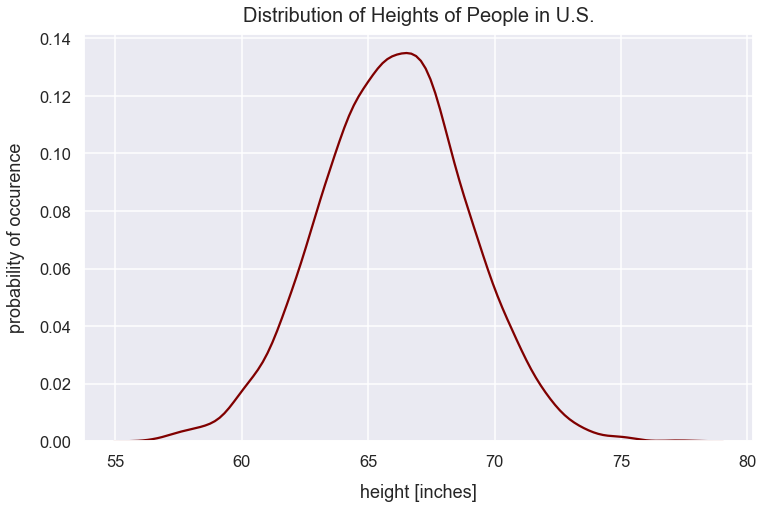

In [22]:
sns.distplot(df_heights['us_height_inches'], color="maroon", hist=False)
plt.xlabel("height [inches]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Heights of People in U.S.", y=1.015, fontsize=20);

For any person's height, we can find the proportion of values greater than or less than that height by finding the appropriate area under the curve.

### Probability of Occurence Given Z-Scores

With a normal distribution, given an observation's value, I can determine the proportion of observations above or below that value. The steps to do so are to calculate the observation's z-score and then find the appropriate area under the curve on one side of the value.

For example, Leslie's height is 63 inches. For what proportion of people is Leslie taller than in the U.S.?

In the scipy stats module, there's a norm (meaning a normal distribution) class with a `cdf` <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html'>method</a> that takes an argument of a z-score for an observation and returns the proportion of values less than that observation.

In [23]:
proportion_of_us_ppl_leslie_taller_than = round(stats.norm.cdf(z_score_leslie_us), 3)
proportion_of_us_ppl_leslie_taller_than

0.149

This proportion value of $0.149$ is equivalent to $14.9\%$. Leslie is taller than just 14.9% of people in the U.S. and she ranks at the 14.9th percentile.

I can visualize her height on the normal distribution and shade the area of heights for which she's taller.

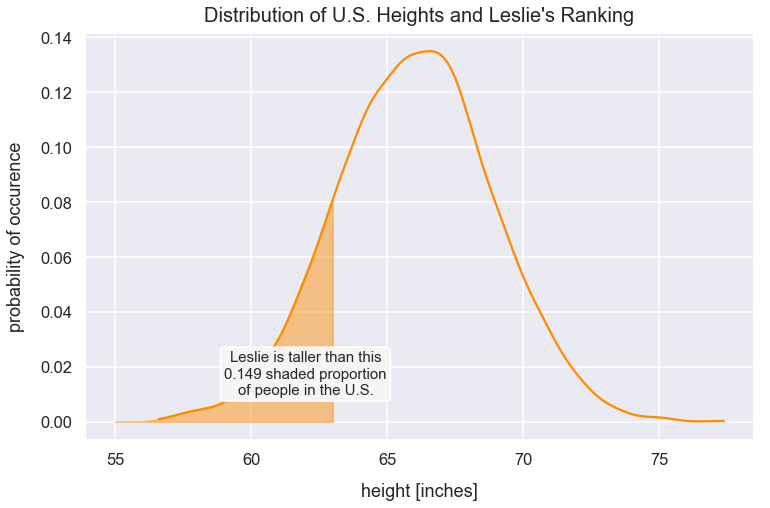

In [24]:
kde = stats.gaussian_kde(df_heights['us_height_inches'])
pos = np.linspace(df_heights['us_height_inches'].min(), df_heights['us_height_inches'].max(), 50000)
plt.plot(pos, kde(pos), color='darkorange')
shade = np.linspace(55, height_leslie_inches, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='darkorange',)
plt.text(x=62, y=.010, horizontalalignment='center', fontsize=15, 
         s="Leslie is taller than this\n{0} shaded proportion\nof people in the U.S.".format(proportion_of_us_ppl_leslie_taller_than), 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))
plt.title("Distribution of U.S. Heights and Leslie's Ranking", fontsize=20, y=1.012)
plt.xlabel("height [inches]", labelpad=15)
plt.ylabel("probability of occurence", labelpad=15);